In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [7]:
import seaborn as sns

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
all_mtn_path = 'Pump_csv_files/ALLMNTVIEWDATA.csv'
df_mtnview = pd.read_csv(all_mtn_path, header = None)

In [10]:
df_mtnview.head()

,0,1,2
0,WPS_MNTVIEW_24VDC_BATTERY_MODE,01/26/2021 15:34:53,NaN
1,WPS_MNTVIEW_24VDC_BATTERY_MODE,01/26/2021 15:36:08,NaN
2,WPS_MNTVIEW_24VDC_BATTERY_MODE,01/26/2021 15:36:23,0
3,WPS_MNTVIEW_24VDC_BATTERY_MODE,01/26/2021 17:30:22,0
4,WPS_MNTVIEW_24VDC_BATTERY_MODE,01/26/2021 19:20:51,0


In [11]:
df_mtnview[0].unique()

array(['WPS_MNTVIEW_24VDC_BATTERY_MODE',
       'WPS_MNTVIEW_ATS#1_SWITCH_POSITION',
       'WPS_MNTVIEW_ATS#1_UTILITY_PWR_AVAIL',
       'WPS_MNTVIEW_ATS#2_SWITCH_POSITION',
       'WPS_MNTVIEW_ATS#2_UTILITY_PWR_AVAIL', 'WPS_MNTVIEW_BUSS#1_FAIL',
       'WPS_MNTVIEW_BUSS#2_FAIL', 'WPS_MNTVIEW_CHLORINE_OUT_OF_RANGE',
       'WPS_MNTVIEW_CL2_RESIDUAL', 'WPS_MNTVIEW_DISCHARGE_FLOW',
       'WPS_MNTVIEW_DISCHARGE_FLOW_TOTAL',
       'WPS_MNTVIEW_DISCHARGE_PRESSURE',
       'WPS_MNTVIEW_DISCHARGE_PRESSURE_OUT_OF_RANGE',
       'WPS_MNTVIEW_FLOW_OUT_OF_RANGE', 'WPS_MNTVIEW_FLOW_VAULT_FLOOD',
       'WPS_MNTVIEW_FUEL_LEVEL', 'WPS_MNTVIEW_FUEL_LEVEL_OUT_OF_RANGE',
       'WPS_MNTVIEW_GENERATOR_NOT_IN_AUTO',
       'WPS_MNTVIEW_GENERATOR_RUNNING', nan,
       'WPS_MNTVIEW_GENERATOR_TROUBLE', 'WPS_MNTVIEW_INTRUSION_ALARM',
       'WPS_MNTVIEW_INTRUSION_TAMPER', 'WPS_MNTVIEW_P1_AUTO',
       'WPS_MNTVIEW_P1_CLA_VALVE_FAIL_TO_CLOSE',
       'WPS_MNTVIEW_P1_CLAY_VALVE_POSITION', 'WPS_MNTVIEW_P1_FA

In [12]:
df_discharge = df_mtnview.loc[df_mtnview[0] == 'WPS_MNTVIEW_DISCHARGE_FLOW']

In [13]:
df_discharge.head()

,0,1,2
30029,WPS_MNTVIEW_DISCHARGE_FLOW,04/03/2020 16:24:07,0
30030,WPS_MNTVIEW_DISCHARGE_FLOW,04/03/2020 18:14:36,0
30031,WPS_MNTVIEW_DISCHARGE_FLOW,04/03/2020 18:34:41,0
30032,WPS_MNTVIEW_DISCHARGE_FLOW,04/03/2020 18:34:56,2509
30033,WPS_MNTVIEW_DISCHARGE_FLOW,04/03/2020 18:51:16,2509


In [14]:
df_discharge[2].unique()

array(['0', '2509', '2496', '2515.5', '2470', '2476.5', '2483', '2457',
       '2463.5', '2522', '2502.5', '2489.5', '2437.5', '2450.5', '2444',
       '2385.5', '2528.5', '2431', '819', '2379', '793', '292.5',
       '1280.5', '2151.5', '1911', '422.5', '1748.5', '2405', '5915',
       '6162', '4478.5', '4498', '494', '2262', '1670.5', '2015', '19.5',
       '2080', '2353', '611', '637', '2255.5', '2301', '6.5', '2002',
       '1696.5', '78', '1111.5', '916.5', '2073.5', '143', '1391', '2340',
       '2418', '2184', '2047.5', '1033.5', '13', '461.5', '1618.5',
       '2138.5', '2392', '1774.5', '903.5', '2372.5', '279.5', '1794',
       '2008.5', '1638', '2535', '1742', '1982.5', '1534', '2093', '2366',
       '2288', '1781', '1573', '32.5', '357.5', '1898', '2307.5', '2171',
       '2398.5', '2327', '1274', '1969.5', '1456', '2314', '1995.5',
       '97.5', '2424.5', '975', '2177.5', '2060.5', '1235', '45.5', '676',
       '1930.5', '1846', '1976', '195', '2320.5', '1352', '2223', '2

In [15]:
df_discharge = df_discharge[~df_discharge[2].str.contains("State", na=False)]

In [16]:
df_discharge[2].unique()

array(['0', '2509', '2496', '2515.5', '2470', '2476.5', '2483', '2457',
       '2463.5', '2522', '2502.5', '2489.5', '2437.5', '2450.5', '2444',
       '2385.5', '2528.5', '2431', '819', '2379', '793', '292.5',
       '1280.5', '2151.5', '1911', '422.5', '1748.5', '2405', '5915',
       '6162', '4478.5', '4498', '494', '2262', '1670.5', '2015', '19.5',
       '2080', '2353', '611', '637', '2255.5', '2301', '6.5', '2002',
       '1696.5', '78', '1111.5', '916.5', '2073.5', '143', '1391', '2340',
       '2418', '2184', '2047.5', '1033.5', '13', '461.5', '1618.5',
       '2138.5', '2392', '1774.5', '903.5', '2372.5', '279.5', '1794',
       '2008.5', '1638', '2535', '1742', '1982.5', '1534', '2093', '2366',
       '2288', '1781', '1573', '32.5', '357.5', '1898', '2307.5', '2171',
       '2398.5', '2327', '1274', '1969.5', '1456', '2314', '1995.5',
       '97.5', '2424.5', '975', '2177.5', '2060.5', '1235', '45.5', '676',
       '1930.5', '1846', '1976', '195', '2320.5', '1352', '2223', '2

In [17]:
df_discharge = df_discharge.rename(columns={0:'sensor_name', 1:'timestamp', 2:'values'})

In [18]:
df_discharge = df_discharge.reset_index(drop=True)

In [19]:
df_discharge.head()

,sensor_name,timestamp,values
0,WPS_MNTVIEW_DISCHARGE_FLOW,04/03/2020 16:24:07,0
1,WPS_MNTVIEW_DISCHARGE_FLOW,04/03/2020 18:14:36,0
2,WPS_MNTVIEW_DISCHARGE_FLOW,04/03/2020 18:34:41,0
3,WPS_MNTVIEW_DISCHARGE_FLOW,04/03/2020 18:34:56,2509
4,WPS_MNTVIEW_DISCHARGE_FLOW,04/03/2020 18:51:16,2509


In [20]:
df_discharge['timestamp'] = pd.to_datetime(df_discharge['timestamp'])

In [21]:
df_discharge.head()

,sensor_name,timestamp,values
0,WPS_MNTVIEW_DISCHARGE_FLOW,2020-04-03 16:24:07,0
1,WPS_MNTVIEW_DISCHARGE_FLOW,2020-04-03 18:14:36,0
2,WPS_MNTVIEW_DISCHARGE_FLOW,2020-04-03 18:34:41,0
3,WPS_MNTVIEW_DISCHARGE_FLOW,2020-04-03 18:34:56,2509
4,WPS_MNTVIEW_DISCHARGE_FLOW,2020-04-03 18:51:16,2509


In [22]:
df_discharge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205762 entries, 0 to 205761
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   sensor_name  205762 non-null  object        
 1   timestamp    205762 non-null  datetime64[ns]
 2   values       205762 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 4.7+ MB


In [23]:
df_discharge = df_discharge.drop(columns=['sensor_name'])

In [24]:
df_discharge.head()

,timestamp,values
0,2020-04-03 16:24:07,0
1,2020-04-03 18:14:36,0
2,2020-04-03 18:34:41,0
3,2020-04-03 18:34:56,2509
4,2020-04-03 18:51:16,2509


I need to convert the values to type float:

In [25]:
df_discharge['values'] = df_discharge['values'].astype('float')

Now I will check for outliers by first looking at a boxplot of the data:

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc842f4bb50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc859af0670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc842f4b700>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc8417886d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc841788a60>],
 'means': []}

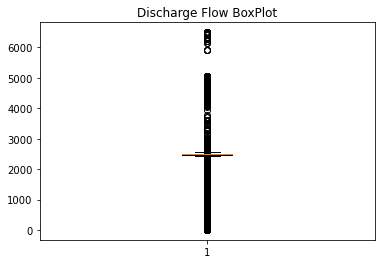

In [26]:
fig1, ax1 = plt.subplots()
ax1.set_title('Discharge Flow BoxPlot')
ax1.boxplot(df_discharge['values'])

And then looking at the distribution of the data to check if the data is skewed

Text(0.5, 0, 'discharge_flow')

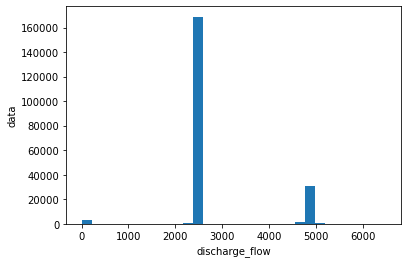

In [27]:
plt.hist(df_discharge['values'], bins=30)
plt.ylabel('data')
plt.xlabel('discharge_flow')

Because it is skewed, I will use the interquantile range to find outliers

In [28]:
IQR = df_discharge['values'].quantile(0.75) - df_discharge['values'].quantile(0.25)
Lower_fence = df_discharge['values'].quantile(0.25) - (IQR * 3)
Upper_fence = df_discharge['values'].quantile(0.75) + (IQR * 3)
print('Discharge flow outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Discharge flow outliers are values < 2379.0 or > 2606.5


I will group by a certain timestamp interval to get consistent timestamps

In [29]:
df_dis_group = df_discharge.groupby(pd.Grouper(key='timestamp', freq='H')).mean()

In [30]:
df_dis_group.reset_index(inplace=True)

Now I will fill missing values with the mean value between rows:

In [31]:
df_dis_group['values'] = pd.concat([df_dis_group['values'].ffill(), df_dis_group['values'].bfill()]).groupby(level=0).mean()

In [32]:
df_dis_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  11999 non-null  datetime64[ns]
 1   values     11999 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 187.6 KB


In [33]:
df_dis_group.head()

,timestamp,values
0,2020-04-03 16:00:00,0.000
1,2020-04-03 17:00:00,751.400
2,2020-04-03 18:00:00,1502.800
3,2020-04-03 19:00:00,2505.750
4,2020-04-03 20:00:00,2500.875


Rename columns to ds and y before using fb prophet to predict forecast

In [34]:
df_dis_group = df_dis_group.rename(columns={'timestamp':'ds', 'values':'y'})

In [35]:
df_dis_group.head()

,ds,y
0,2020-04-03 16:00:00,0.000
1,2020-04-03 17:00:00,751.400
2,2020-04-03 18:00:00,1502.800
3,2020-04-03 19:00:00,2505.750
4,2020-04-03 20:00:00,2500.875


Attempt to forecast:

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


Initial log joint probability = -386.248
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       14825.5     0.0515585       434.416           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       14851.4     0.0083609       140.698           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     297       14857.1   0.000139893       91.6257   1.062e-06       0.001      420  LS failed, Hessian reset 
     299       14857.3    0.00251922        54.745           1           1      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333       14858.3   0.000194243       120.379   2.078e-06       0.001      510  LS failed, Hessian reset 
     399       14858.4   2.05575e-05       58.0587      0.3399           1      607   
    Iter      log pro

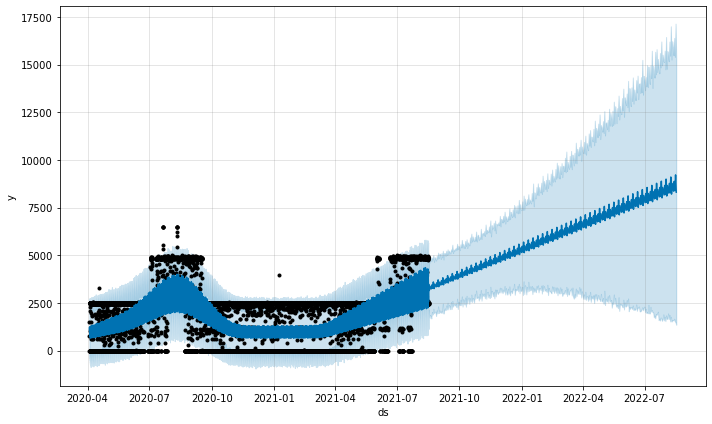

In [36]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df_dis_group)
future = model.make_future_dataframe(periods=365 * 1)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()